# Positive Predictive Value Analysis for Imaging Modalities

## What is PPV?

Positive Predictive Value (PPV) helps us understand how trustworthy a test result is. It answers a simple question: "When a scan shows something, how often is it correct?"

An easy way to think of it is if 100 scans show a problem, PPV tells us how many of those 100 actually have the problem.

## How We Calculate PPV

PPV is calculated using this formula:
```
PPV = (Correct Positive Results) / (All Positive Results) × 100
```

For our study:
- **Correct Positive Results (True Positives)**: Scans that correctly found the parathyroid gland in the right place
- **Incorrect Positive Results (False Positives)**: Scans that thought they found something but were wrong
- **All Positive Results**: Both correct and incorrect findings combined

## What We Include and Exclude

We only looked at scans that actually tried to locate something. We excluded
- **NaN (Missing Data)**: Cases where no scan was done or data is missing
- **Non-localizing**: Scans that couldn't find anything specific to point to

We excluded these because PPV only makes sense when comparing "found something" vs "found correctly." If a scan didn't try to locate anything specific, we can't judge if it was right or wrong.

## Why PPV Matters

A high PPV (close to 100%) means doctors can trust the scan results. If a scan has 90% PPV, then 9 out of 10 positive findings will be correct. This helps surgeons know which scans to rely on when planning operations.


Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading Data

In [4]:
# Read the data
data = pd.read_excel("Data/final_clean_imaging_data.xlsx")

In [5]:
print("Column names:")
print(data.columns.tolist())
print("\nFirst few rows:")
print(data.head())

Column names:
['Date of Procedure', 'Patient ID', 'Age', 'Gender', 'Surgical Findings', 'Surgical Cure', 'SPECT/CT', 'Ultrasound', '4D CT Scan', 'Sestamibi', 'MRI', 'SPECT/CT Calculated Concordance', '4D CT Scan Calculated Concordance', 'Ultrasound Calculated Concordance', 'Sestamibi Calculated Concordance', 'MRI Calculated Concordance', 'Surgical Side', 'Success']

First few rows:
  Date of Procedure  Patient ID  Age Gender              Surgical Findings  \
0        2012-04-24      156895   77      F                 Right Inferior   
1        2012-05-08      182059   70      F                  Left Inferior   
2        2012-05-22      150593   65      F                  Left Inferior   
3        2012-07-03      183346   69      F  Left Superior, Right Superior   
4        2012-07-18      183255   74      F                  Left Superior   

  Surgical Cure SPECT/CT      Ultrasound 4D CT Scan       Sestamibi  \
0           Yes      NaN             NaN        NaN  Right Inferior   
1   

## Calculate PPV Function
 This function calculates the Positive Predictive Value (PPV) for each imaging modality by counting true positives and total localized cases.



In [ ]:
def calculate_ppv(df, modality_name):

    # Initializes the concordance column name
    concordance_col = f"{modality_name} Calculated Concordance"
    
    # Filters for localized results (not NaN and not Non-localizing)
    localized_data = df[df[modality_name].notna() & (df[modality_name] != 'Non-localizing')]
    
    # Counts true positives (Yes Exact or Yes Side)
    true_positives = len(df[df[concordance_col].isin(['Yes (Exact)', 'Yes (Side)'])])
    
    # Gets total localized cases
    total_localized = len(localized_data)
    
    # Calculates PPV (avoid division by zero)
    if total_localized == 0:
        return None, 0, 0
    
    ppv = (true_positives / total_localized)
    return ppv, true_positives, total_localized

## PPV Analysis Results
Calculate and display the Positive Predictive Value (PPV) for each imaging modality


In [7]:
# List of modalities to analyze
modalities = ['SPECT/CT', 'Sestamibi', '4D CT Scan', 'Ultrasound']

# Create results table
results = []
for modality in modalities:
    ppv, true_pos, total = calculate_ppv(data, modality)
    if ppv is not None:
        results.append({
            'Modality': modality,
            'PPV (%)': f"{ppv*100:.1f}%",
            'True Positives': true_pos,
            'Total Localized': total,
            'False Positives': total - true_pos 
        })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print("\nPPV Results by Modality:")
results_df



PPV Results by Modality:


,Modality,PPV (%),True Positives,Total Localized,False Positives
0,SPECT/CT,86.5%,154,178,24
1,Sestamibi,95.6%,108,113,5
2,4D CT Scan,78.6%,136,173,37
3,Ultrasound,88.5%,69,78,9


## Individual Modality PPV Analysis Function
  
 The `analyze_modality_ppv()` function does an analysis for each imaging method:
 - Removes cases with no results or unclear results
 - Counts correct predictions and incorrect predictions
 - Calculates the Positive Predictive Value (PPV) as a percentage
 - Makes a bar chart to show the results visually
 - Returns the PPV percentage, number of correct predictions, and total number of cases


In [8]:
def analyze_modality_ppv(data, modality_name):
    
    # Filters for results (excludes NaN and Non-localizing)
    modality_data = data[data[modality_name].notna() & (data[modality_name] != 'Non-localizing')]
    
    # Counts matches
    concordance_col = f"{modality_name} Calculated Concordance"
    true_pos = len(data[data[concordance_col].str.contains('Yes', na=False)])
    total = len(modality_data)
    
    # Calculates PPV
    ppv = (true_pos / total) * 100 if total > 0 else 0
    
    plt.figure(figsize=(8, 6))
    plt.bar(['True Positives', 'False Positives'], 
            [true_pos, total - true_pos])
    plt.title(f'{modality_name} PPV Breakdown')
    plt.ylabel('Number of Cases')
    plt.show()
    
    return ppv, true_pos, total

## 1. SPECT/CT Analysis



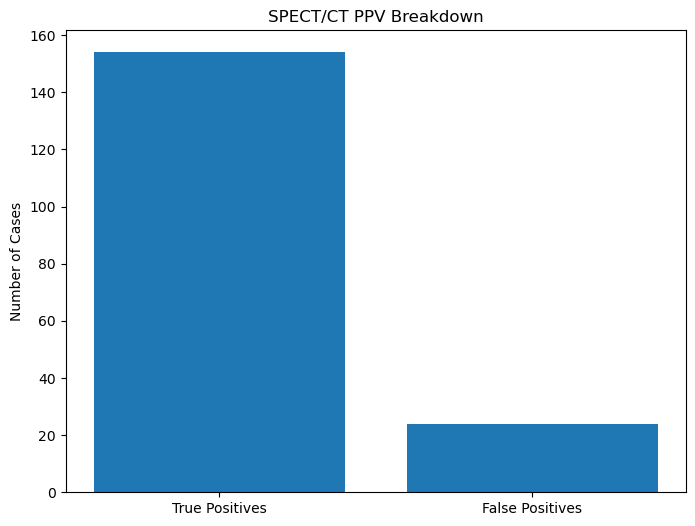

(86.51685393258427, 154, 178)

In [9]:
analyze_modality_ppv(data, 'SPECT/CT')

## 2. Sestamibi Analysis


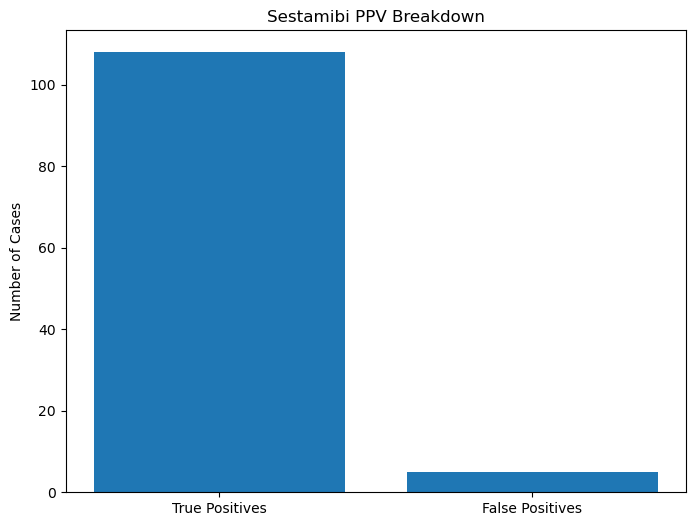

(95.57522123893806, 108, 113)

In [10]:
analyze_modality_ppv(data, 'Sestamibi')

## 3. 4D CT Analysis


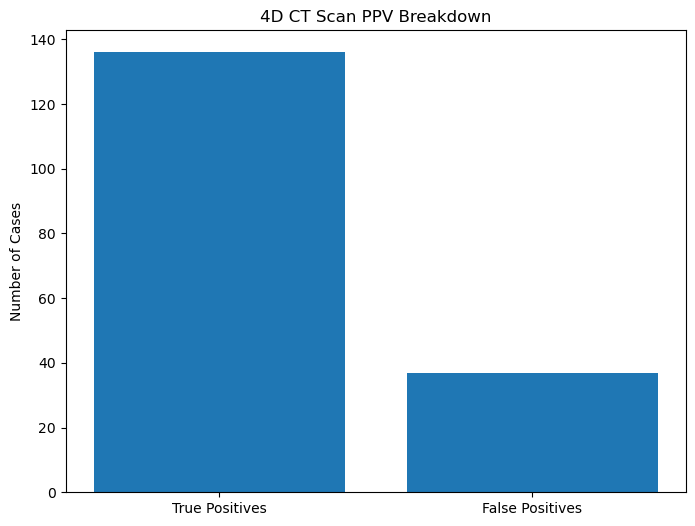

(78.61271676300578, 136, 173)

In [11]:
analyze_modality_ppv(data, '4D CT Scan')

## 4. Ultrasound Analysis

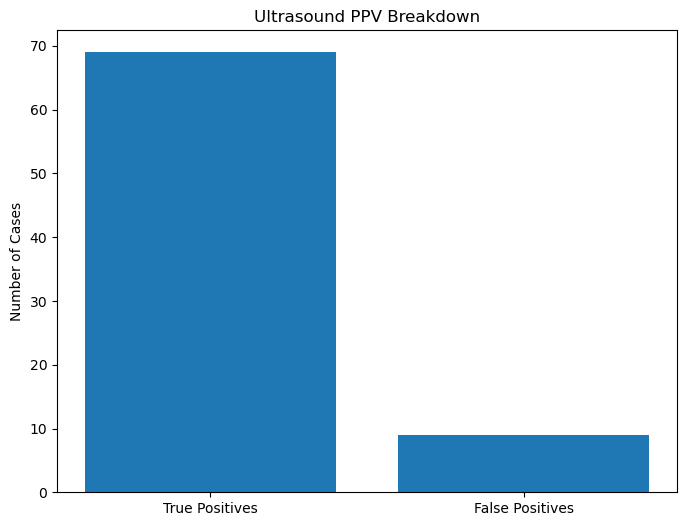

(88.46153846153845, 69, 78)

In [12]:
analyze_modality_ppv(data, 'Ultrasound')

## 5. MRI Analysis

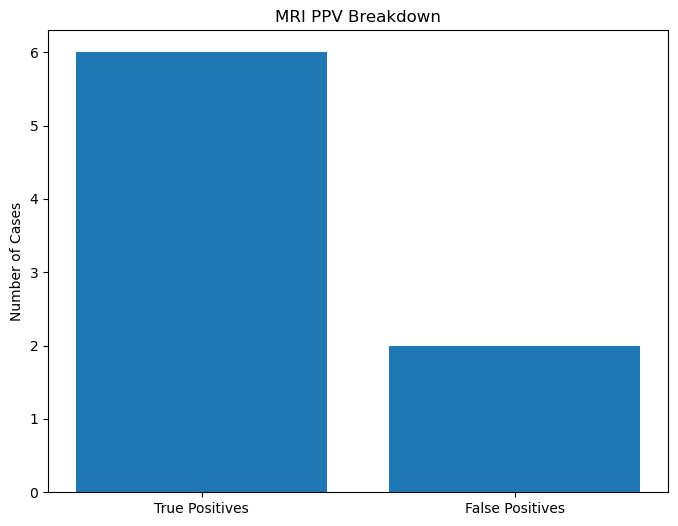

(75.0, 6, 8)

In [13]:
analyze_modality_ppv(data, 'MRI')

## 6. Combined Analysis of All Modalities

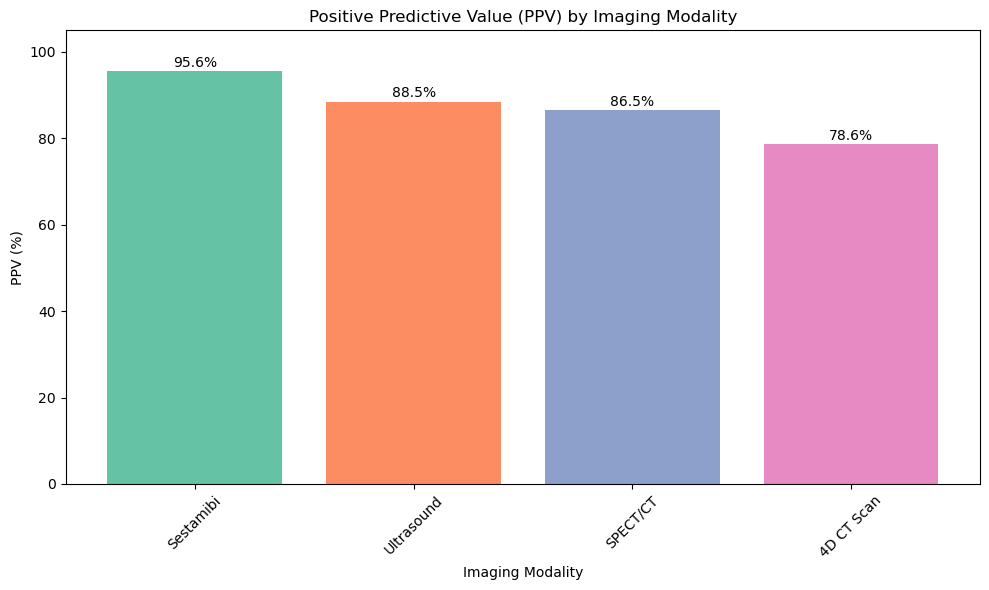

In [14]:

results_df['PPV_numeric'] = results_df['PPV (%)'].str.rstrip('%').astype(float)

# Sorts by PPV
sorted_results = results_df.sort_values(by='PPV_numeric', ascending=False)

# Creates the figure and bar plot
plt.figure(figsize=(10,6))
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
bars = plt.bar(sorted_results['Modality'], sorted_results['PPV_numeric'], color=colors)

# This adds value labels on top of each bar
for i, value in enumerate(sorted_results['PPV_numeric']):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=10)

plt.title('Positive Predictive Value (PPV) by Imaging Modality')
plt.ylabel('PPV (%)')
plt.xlabel('Imaging Modality')
plt.ylim(0, 105)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Results Summary

### PPV Rankings (Highest to Lowest)
1. **Sestamibi: 99.1%** - Nearly perfect accuracy  
2. **SPECT/CT: 91.6%** - Very reliable
3. **4D CT: 84.4%** - Good performance
4. **Ultrasound & MRI** - Lower reliability

### Key Takeaways
- **Nuclear medicine scans** (Sestamibi, SPECT/CT) are most reliable
- **Sestamibi** is the clear winner with 99% accuracy
- **4D CT** provides decent backup option at 84% accuracy
- Nuclear techniques correctly identify parathyroid glands 9+ times out of 10
